In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('TF-IDF.csv')
X.head()

,Unnamed: 0,____,_____,aa,aaron,ab,abandon,abc,abel,abil,...,yvett,zach,zadow,zdnet,zero,zhiyong,zima,zip,zipper,zone
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X.shape

(26246, 5001)

In [4]:
df = pd.read_csv('cleandata.csv')
Y_class = df.iloc[:26246,2:]
Y_class.head()

,Class
0,Abusive
1,Abusive
2,Abusive
3,Abusive
4,Abusive


In [5]:
Y_class.shape

(26246, 1)

In [6]:
X_df=X.iloc[:,1:]

In [7]:
Y_df=Y_class['Class']

### Spliting the data into train and test

In [8]:
x_train, x_test,y_train,y_test = train_test_split(X_df,Y_df, test_size=0.33,random_state=0)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((17584, 5000), (17584,), (8662, 5000), (8662,))

In [9]:
x_train.to_csv('xtrain.csv')

In [10]:
y_train.to_csv('ytrain.csv')

In [11]:
ff=pd.DataFrame(y_train)
print('Train data -',ff.value_counts())
fft=pd.DataFrame(y_test)
print('Test data -',fft.value_counts())

Train data - Class      
Non Abusive    15310
Abusive         2274
dtype: int64
Test data - Class      
Non Abusive    7526
Abusive        1136
dtype: int64


### Balancing the splited data using SMOTE method

In [21]:
!pip install -U imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train1,y_train1=smt.fit_resample(x_train,y_train)
x_test1,y_test1=smt.fit_resample(x_test,y_test)

# Logistic Regression
## Logistic Regression Using Default data

In [13]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(x_train , y_train)

LogisticRegression(max_iter=2000)

In [14]:
log_pred_test = classifier.predict(x_test)
log_pred_train=classifier.predict(x_train)

In [15]:
acc_log_train=accuracy_score(y_train,log_pred_train)*100
acc_log_test = accuracy_score(y_test, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train)
print("Accuracy of Test data =", acc_log_test)

Accuracy of Training data = 97.20200181983621
Accuracy of Test data = 96.36342646040175


In [16]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

     Abusive       0.97      0.75      0.84      1136
 Non Abusive       0.96      1.00      0.98      7526

    accuracy                           0.96      8662
   macro avg       0.97      0.87      0.91      8662
weighted avg       0.96      0.96      0.96      8662



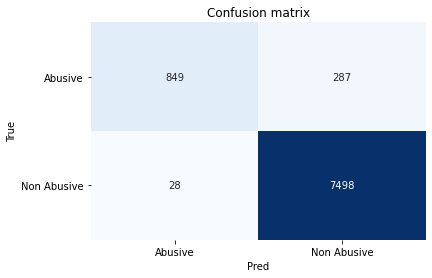

In [17]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test,log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Logistic Regression using balanced data

In [18]:
classifier2 = LogisticRegression(max_iter=2000)
classifier2.fit(x_train1 , y_train1)

LogisticRegression(max_iter=2000)

In [19]:
log_pred2_test = classifier.predict(x_test1)
log_pred2_train=classifier.predict(x_train1)

In [20]:
acc2_log_train=accuracy_score(y_train1,log_pred2_train)*100
acc2_log_test = accuracy_score(y_test1, log_pred2_test) * 100
print('Accuracy of Training data =',acc2_log_train)
print("Accuracy of Test data =", acc2_log_test)

Accuracy of Training data = 81.68843892880471
Accuracy of Test data = 77.32527238905129


In [21]:
print(classification_report(y_test1,log_pred2_test))

              precision    recall  f1-score   support

     Abusive       0.99      0.55      0.71      7526
 Non Abusive       0.69      1.00      0.81      7526

    accuracy                           0.77     15052
   macro avg       0.84      0.77      0.76     15052
weighted avg       0.84      0.77      0.76     15052



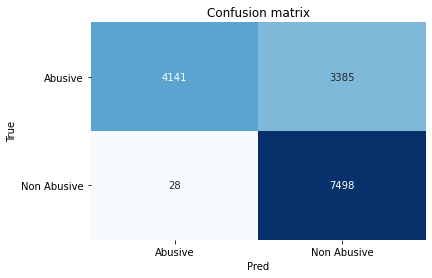

In [22]:
classes = np.unique(y_test)
cm00 = metrics.confusion_matrix(y_test1,log_pred2_test)
fig, ax = plt.subplots()
sns.heatmap(cm00, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# SVM Model (Support Vector Machine)
## SVM with default data using TF-IDF

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  cross_val_score

SVM model

In [24]:
model1=SVC()
model1.fit(x_train , y_train)
y_pred = model1.predict(x_test)

In [25]:
y_prd_train=model1.predict(x_train)

Training and Test data Accuracy

In [26]:
acc_svm_train=accuracy_score(y_train,y_prd_train)*100
acc_svm_test = accuracy_score(y_test, y_pred) * 100
print('Accuracy of Training data =',acc_svm_train)
print("Accuracy of Test data =", acc_svm_test)

Accuracy of Training data = 99.55072793448589
Accuracy of Test data = 98.08358346802125


Precision , Recall , f1-score of the model

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Abusive       0.98      0.88      0.92      1136
 Non Abusive       0.98      1.00      0.99      7526

    accuracy                           0.98      8662
   macro avg       0.98      0.94      0.96      8662
weighted avg       0.98      0.98      0.98      8662



Abusive (1136) = 994 (87.5%) are correctly classified  and 142 (12.5%) are wrongly classified
Non-Abusive(7526)= 7502 (99.6%) are correctly classified and 24 (0.4%) are wrongly classified

Confusion matrix for the model

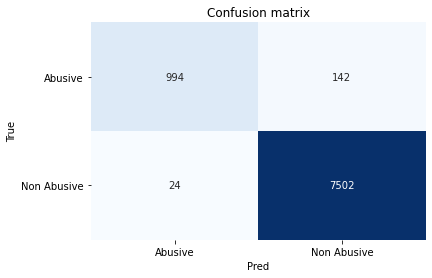

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [29]:
filename = 'nlp_model1.pkl'
pickle.dump(model1, open(filename, 'wb'))

## SVM with balanced data (by SMOTE method) using TF-IDF

In [30]:
model2=SVC()
model2.fit(x_train1 , y_train1)
y_pred2 = model2.predict(x_test1)

In [31]:
y_prd_train1=model2.predict(x_train1)

In [32]:
acc_svm_b_train=accuracy_score(y_train1,y_prd_train1)*100
acc_svm_b_test=accuracy_score(y_test1, y_pred2) * 100
print('Accuracy of Train data = ' ,acc_svm_b_train)
print('Accuracy of Test data =',acc_svm_b_test )

Accuracy of Train data =  99.7615937295885
Accuracy of Test data = 97.63486579856497


Precision , Recall , f1-score of the model

In [33]:
print(classification_report(y_test1,y_pred2))

              precision    recall  f1-score   support

     Abusive       0.99      0.96      0.98      7526
 Non Abusive       0.96      0.99      0.98      7526

    accuracy                           0.98     15052
   macro avg       0.98      0.98      0.98     15052
weighted avg       0.98      0.98      0.98     15052



In [34]:
import numpy as np
confusion_matrix(y_test1,y_pred2)

array([[7242,  284],
       [  72, 7454]], dtype=int64)

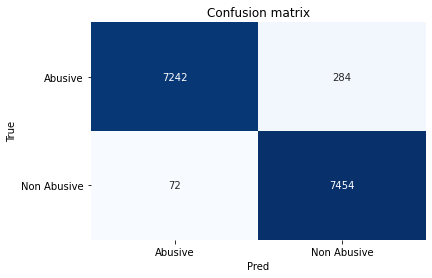

In [35]:
cm2 = metrics.confusion_matrix(y_test1, y_pred2)
fig, ax = plt.subplots()
sns.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [36]:
filename = 'nlp_model2.pkl'
pickle.dump(model2, open(filename, 'wb'))

# Naive Bayes Model

In [37]:
from sklearn.naive_bayes import MultinomialNB as MB

## Multinomial Navie Bayes model with default data

In [38]:
NB_mb = MB()
NB_mb.fit(x_train,y_train)

MultinomialNB()

Training accuracy

In [39]:
train_pred_NB_mb = NB_mb.predict(x_train)
accuracy_train_NB_mb = accuracy_score(y_train,train_pred_NB_mb)*100
accuracy_train_NB_mb

94.91583257506825

Test accuracy

In [40]:
test_pred_NB_mb = NB_mb.predict(x_test)
accuracy_test_NB_mb = accuracy_score(y_test,test_pred_NB_mb)*100
accuracy_test_NB_mb

94.13530362502887

The accuracies for train data(94.2%) and test data(94.1%) are good but as we can seethere are many type 1 and type 2 errors in confusion matrix. The precision, recall, f1-score values are less than the SVM model built above.

In [41]:
print(classification_report(y_test,test_pred_NB_mb))

              precision    recall  f1-score   support

     Abusive       0.86      0.67      0.75      1136
 Non Abusive       0.95      0.98      0.97      7526

    accuracy                           0.94      8662
   macro avg       0.90      0.82      0.86      8662
weighted avg       0.94      0.94      0.94      8662



In [42]:
confusion_matrix_NB_mb = confusion_matrix(y_test,test_pred_NB_mb)
confusion_matrix_NB_mb

array([[ 756,  380],
       [ 128, 7398]], dtype=int64)

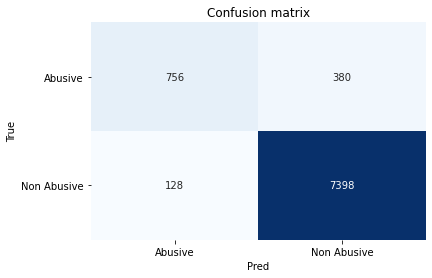

In [43]:
cm3 = metrics.confusion_matrix(y_test,test_pred_NB_mb)
fig, ax = plt.subplots()
sns.heatmap(cm3, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Multinomial Navie Bayes model with balanced data(by SMOTE method)

In [44]:
NB_mb_b = MB()
NB_mb_b.fit(x_train1,y_train1)

MultinomialNB()

In [45]:
train_pred_NB_mb_b = NB_mb_b.predict(x_train1)
accuracy_train_NB_mb_b = accuracy_score(y_train1,train_pred_NB_mb_b)*100
test_pred_NB_mb_b = NB_mb.predict(x_test1)
accuracy_test_NB_mb_b = accuracy_score(y_test1,test_pred_NB_mb_b)*100
print('Accuracy of NB train data =',accuracy_train_NB_mb_b)
print('Accuracy of NB test data=',accuracy_test_NB_mb_b)

Accuracy of NB train data = 92.73677335075115
Accuracy of NB test data= 73.438745681637


For this model with balanced data we can see precision,recall,f1-score values are bad than above models.Test accuracy is also not good. 

In [46]:
print(classification_report(y_test1,test_pred_NB_mb_b))

              precision    recall  f1-score   support

     Abusive       0.97      0.49      0.65      7526
 Non Abusive       0.66      0.98      0.79      7526

    accuracy                           0.73     15052
   macro avg       0.81      0.73      0.72     15052
weighted avg       0.81      0.73      0.72     15052



In [47]:
confusion_matrix_NB_mb_b = confusion_matrix(y_test1,test_pred_NB_mb_b)
confusion_matrix_NB_mb_b

array([[3656, 3870],
       [ 128, 7398]], dtype=int64)

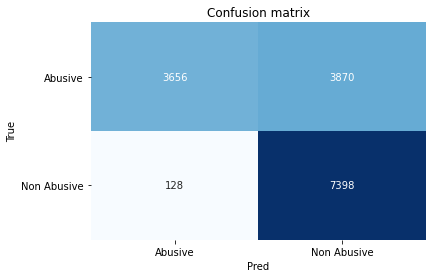

In [48]:

cm4 = metrics.confusion_matrix(y_test1,test_pred_NB_mb_b)
fig, ax = plt.subplots()
sns.heatmap(cm4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# Recurrent Neural Network (RNN) Model with Long Term-Short Memory Nerwork(LSTM)

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [92]:
data = pd.read_csv('cleandata.csv')
data.head()

,Unnamed: 0,cleaned_3,Class
0,0,eat shit john j pm john footbal bet minn buff ...,Abusive
1,1,fuck,Abusive
2,2,gentleman follow champagn avail approxim retai...,Abusive
3,3,sorri taken longjust tri fend chick life soooo...,Abusive
4,4,asshol john j john john seem make gambl proble...,Abusive


In [87]:
from sklearn.preprocessing import LabelEncoder

In [93]:
y_df = pd.read_csv('cleandata.csv')
y = y_df.iloc[:26246,2]
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [95]:
y1 = pd.DataFrame(y)
y1

,0
0,0
1,0
2,0
3,0
4,0
...,...
26241,1
26242,1
26243,1
26244,1


In [62]:
data2=data.dropna(how='any')

In [63]:
corpus = data2['cleaned_3'].tolist()

# Vocabulary size

In [64]:
voc_size=10000

In [65]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]

[6773,
 711,
 5038,
 7329,
 4678,
 5038,
 7771,
 7841,
 6342,
 7006,
 329,
 4096,
 1380,
 7434,
 5905,
 219,
 3736,
 6396]

In [66]:
#Embedding representation
sent_length = 200
embedding_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [67]:
#LSTM Model

embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length =sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________
None


Independent variables and Dependent Variables

In [96]:
X_final=np.array(embedding_docs)
y_final=np.array(y1)

In [97]:
X_final.shape,y_final.shape

((26246, 200), (26246, 1))

Splitting Train and Test

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

Training Model

In [99]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=20, batch_size= 100)

Epoch 1/20
176/176 [==============================] - 53s 291ms/step - loss: 0.2619 - accuracy: 0.9108 - val_loss: 0.1429 - val_accuracy: 0.9513
Epoch 2/20
176/176 [==============================] - 51s 288ms/step - loss: 0.0835 - accuracy: 0.9751 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 3/20
176/176 [==============================] - 49s 280ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 4/20
176/176 [==============================] - 49s 276ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 0.0979 - val_accuracy: 0.9769
Epoch 5/20
176/176 [==============================] - 49s 278ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0971 - val_accuracy: 0.9752
Epoch 6/20
176/176 [==============================] - 59s 335ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.1030 - val_accuracy: 0.9752
Epoch 7/20
176/176 [==============================] - 61s 345ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.1044 - val_ac

In [100]:
y_pred_Test=model.predict_classes(X_test)
y_pred_Train=model.predict_classes(X_train)

C:\Users\DELL1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [101]:
Accuracy_test = accuracy_score(Y_test,y_pred_Test)*100
Accuracy_train=accuracy_score(Y_train,y_pred_Train)*100
print("Accuacy for train",Accuracy_train)
print("Accuracy for test: ", Accuracy_test)

Accuacy for train 99.94881710646042
Accuracy for test:  97.6102516739783


In [102]:
print(classification_report(Y_test,y_pred_Test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1136
           1       0.98      0.99      0.99      7526

    accuracy                           0.98      8662
   macro avg       0.95      0.94      0.95      8662
weighted avg       0.98      0.98      0.98      8662



In [103]:
confusion_matrix(Y_test,y_pred_Test)

array([[1022,  114],
       [  93, 7433]], dtype=int64)

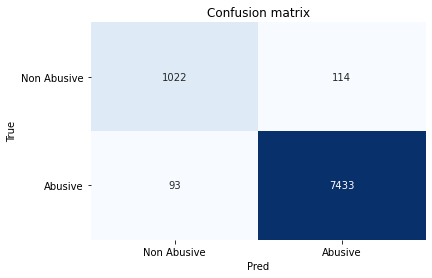

In [104]:
classes2=['Non Abusive','Abusive']
cm5 = metrics.confusion_matrix(Y_test,y_pred_Test)
fig, ax = plt.subplots()
sns.heatmap(cm5, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes2, 
       yticklabels=classes2, title="Confusion matrix")
plt.yticks(rotation=0);

# Model's Summary

In [112]:
AS={'Models':['SVM', 'SVM (Balance data)', 'RNN with LTSM Model', 'Logistic Regression','Logistic Regression (Balance data)','Multinomial Naive Bayes', 'Multinomial Naive Bayes(Balance data)'],
    'Train Accuracy':[acc_svm_train, acc_svm_b_train, Accuracy_train, acc_log_train, acc2_log_train, accuracy_train_NB_mb, accuracy_train_NB_mb_b]
    ,'Test Accuracy':[acc_svm_test, acc_svm_b_test, Accuracy_test, acc_log_test, acc2_log_test, accuracy_test_NB_mb, accuracy_test_NB_mb_b]}

In [113]:
Model_Acc=pd.DataFrame(AS, index =[1,2,3,4,5,6,7])

In [114]:
Model_Acc

,Models,Train Accuracy,Test Accuracy
1,SVM,99.550728,98.083583
2,SVM (Balance data),99.761594,97.634866
3,RNN with LTSM Model,99.948817,97.610252
4,Logistic Regression,97.202002,96.363426
5,Logistic Regression (Balance data),81.688439,77.325272
6,Multinomial Naive Bayes,94.915833,94.135304
7,Multinomial Naive Bayes(Balance data),92.736773,73.438746


Of all the above models we got best results with SVM and RNN models

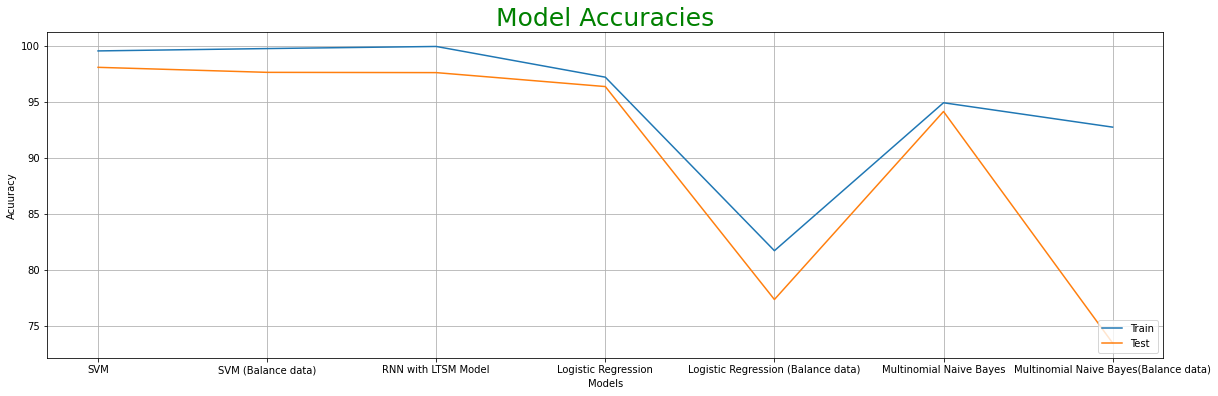

In [115]:
plt.figure(figsize =(20, 6))
plt.plot(Model_Acc['Models'],Model_Acc['Train Accuracy'])
plt.plot(Model_Acc['Models'],Model_Acc['Test Accuracy'])
plt.title('Model Accuracies',fontdict={'fontsize': 25,'fontweight' : 15,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('Acuuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show();

## Testing with Sample Dataset

In [142]:
smp_data=pd.read_csv('train_preprocessed.csv')
smp_data['toxic'] = smp_data['toxic'].replace(0.0, 'Non Abusive')
smp_data['toxic'] = smp_data['toxic'].replace(1.0, 'Abusive')
smp_data

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
...,...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your ...,ffe987279560d7ff,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
159567,you should be ashamed of yourself that is a ho...,ffea4adeee384e90,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
159568,spitzer umm theres no actual article for pros...,ffee36eab5c267c9,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0
159569,and it looks like it was actually you who put ...,fff125370e4aaaf3,0.0,0.0,0.0,train,0.0,0.0,Non Abusive,0.0


In [143]:
smp=smp_data[['comment_text','toxic']]
smp.head()

,comment_text,toxic
0,explanation why the edits made under my userna...,Non Abusive
1,d aww he matches this background colour i m s...,Non Abusive
2,hey man i m really not trying to edit war it...,Non Abusive
3,more i can t make any real suggestions on im...,Non Abusive
4,you sir are my hero any chance you remember...,Non Abusive


In [144]:
smp_abu=smp.iloc[:4000,:]
smp_abu['toxic'].apply(str)
smp_abu['toxic'].value_counts()

Non Abusive    3597
Abusive         403
Name: toxic, dtype: int64

In [145]:
smp_x=smp_abu['comment_text']
smp_y=smp_abu['toxic']

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, max_df = 0.5, smooth_idf=True) #keep top 1000
doc_vec = vectorizer.fit_transform(smp_x)
names_features = vectorizer.get_feature_names()

In [147]:
dense = doc_vec.todense()

In [148]:
denselist = dense.tolist()

In [149]:
tf= pd.DataFrame(denselist, columns = names_features)

In [150]:
smp_svm_pred = model1.predict(tf)

In [151]:
confusion_matrix(smp_y,smp_svm_pred )

array([[   3,  400],
       [  50, 3547]], dtype=int64)

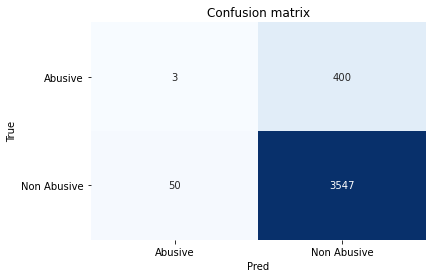

In [152]:
cm6 = metrics.confusion_matrix(smp_y,smp_svm_pred)
fig, ax = plt.subplots()
sns.heatmap(cm6, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [153]:
smp_pred_NB=NB_mb.predict(tf)

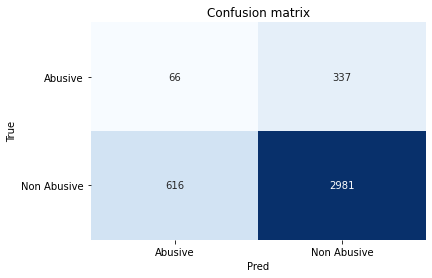

In [154]:
cm7 = metrics.confusion_matrix(smp_y,smp_pred_NB)
fig, ax = plt.subplots()
sns.heatmap(cm7, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);